### 통계적 가설
- 통계적 가설은 크게 두 가지로 나누어진다.
- 귀무가설과 대립가설

### 귀무 가설(H<sub>0</sub>)
- "차이가 없다", "효과가 없다", "서로 관련이 없다"라는 의미를 가진 가설이다.

### 대립 가설(H<sub>1</sub>)
- "차이가 있다", "효과가 있다", "서로 관련이 있다"라는 의미를 가진 가설이다.

### 활용
- 만약 귀무 가설을 세웠다면 이 가설이 기각되는지를 확인한다.
- 만약 기각이 되면 이 가설은 잘못된 가설임을 평가 하거나 이와 반대 되는 가설을 채택하게 된다.
- 만약 대립 가설을 세웠다면 이 가설이 채택되는지를 확인한다.
- 만액 채택이 되면 이 가설은 올바른 가설임을 평가 하거나 이와 반대 되는 가설을 기각한다.
- 통계는 매우 보수적인 학문으로써, 확인한 증거(데이터)가 나오기 전까지 귀무가설(효과 없음)이 맞다고 가정하면서 가설을 검증하는 방향쪽은 사용한다.

### 상황별 가설의 종류와 검증 방법 - "차이"를 보고 싶을 때
- 집단 간에 평균이나 비율이 다른지 확인할 때 사용한다.

|상황|귀무가설 예시|대립가설 예시|검증방법|python 함수|
|-|-|-|-|-|
|단일 집단|우리 반 평균 키는 170cm와 같다|우리반 평균 키는 170cm와 다르다|1-sample T-test|stats.ttest_1samp|
|두 집단(독립)|A반과 B반의 성적은 차이가 없다|A반과 B반의 성적은 차이가 있다|independent T-test|stats.ttest_ind|
|두 집단(대응)|다이어트 전후 몸무게 차이는 없다|다이어트 전후 몸무게 차이가 있다|Paired T-test|stats.ttest_rel|
|세 집단 이상|A, B, C 비료 간 성장 차이는 없다|A, B, C 비료 중 적어도 한 비료는 차이가 있다|ANOVA(분산 분석)|stats.f_oneway|

### "관계"를 보고 싶을 때
- 변수들이 서로 영향을 주고 받는지 확인할 때 사용한다.

|상황|귀무가설 예시|대립가설 예시|검증방법|python함수|
|-|-|-|-|-|
|범주형 vs 범주형|성별과 흡연 여부는 서로 관련이 없다(독립이다)|성별과 흡연 여부는 서로 관련이 있다|Chi-square Test|stats.chi2_contingency|
|수치형 vs 수치형|공부 시간과 성적의 상관계수는 0이다|공부 시간과 성적의 상관계수는 0이 아니다|Pearson Correlation|stats.pearsonr|
|인과 관계(회귀)|광고비가 매출에 미치는 영향(회귀계수)는 0이다|광고비가 매출에 미치는 영향은 0이 아니다|Linear Regression|statsmodels.OLS|

### 가설 검증 프로세스
- 시나리오 : 신약을 먹은 그룹이 안먹은 그룹보다 회복이 빠를까?
---
- 1단계 : 가설을 설정한다.
- 귀무가설 : 신약 그룹과 위약 그룹의 회복 기간 평균은 같다(약효 없음)
- 대립가설 : 신약 그룹과 위약 그룹의 회복 기간 평균은 다르다(약효 있음)
---
- 2단계 : 유의 수준 결정
- 유의 수준이란 오판할 확률의 범위를 설정한다.
- 일반적으로 0.05(5%)로 설정한다(오판할 확률을 5%까지만 허용한다.)
---
- 3단계 : 검증을 수행한다.

### 가설 검증 프로세스
- 시나리오 : 신약을 먹은 그룹이 안먹은 그룹보다 회복이 빠를까?
---
- 1단계 : 가설을 설정한다.
- 귀무가설 : 신약 그룹과 위약 그룹의 회복 기간 평균은 같다(약효 없음)
- 대립가설 : 신약 그룹과 위약 그룹의 회복 기간 평균은 다르다(약효 있음)
---
- 2단계 : 유의 수준 결정
- 유의 수준이란 오판할 확률의 범위를 설정한다.
- 일반적으로 0.05(5%)로 설정한다(오판할 확률을 5%까지만 허용한다.)
---
- 3단계 : 검증을 수행한다.
- p-value : Probability-value의 약자. 
- 위에서 정리한 테스트를 통해 얻은 결과이다.
- 이 값이 유의 수준($\alpha$)보다 낮아야 한다.

In [1]:
from scipy import stats
import numpy as np

In [3]:
# 데이터 (회복 기간:일)
# 신약을 복용한 그룹
drug_group = [7, 8, 9, 7, 6, 8, 0, 10, 7, 8]
# 신약을 복용하지 않은 그룹
placebo_group = [10, 12, 11, 13, 10, 11, 12, 13, 11, 10]

print(len(drug_group))
print(len(placebo_group))

10
10


In [4]:
# T-test 수행
t_stat, p_val = stats.ttest_ind(drug_group, placebo_group)
print(f'P Value : {p_val}')

P Value : 0.00021457654242841806


In [5]:
# 유의 구간 설정
alpha = 0.05

if p_val < alpha :
    print('결과 : 귀무가설 기각')
    print('해석 : 통계적으로 유의미한 차이가 별견됨. 신약은 효과가 있다')
else :
    print('결과 : 귀무가설 기각')
    print('해석 : 통계적으로 유의미한 차이가 발견되지 않았다. 신약은 효과가 없다')

결과 : 귀무가설 기각
해석 : 통계적으로 유의미한 차이가 별견됨. 신약은 효과가 있다


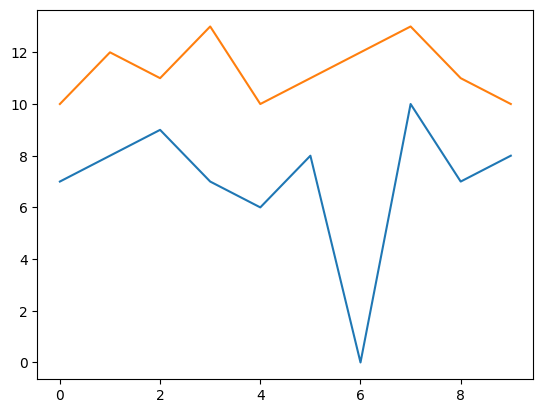

In [6]:
drug_group = [7, 8, 9, 7, 6, 8, 0, 10, 7, 8]
# 신약을 복용하지 않은 그룹
placebo_group = [10, 12, 11, 13, 10, 11, 12, 13, 11, 10]

import matplotlib.pyplot as plt

plt.plot(drug_group)
plt.plot(placebo_group)
plt.show()